<a href="https://colab.research.google.com/github/kej534923-maker/ECON5200-Applied-Data-Analytics/blob/main/In_class_note_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

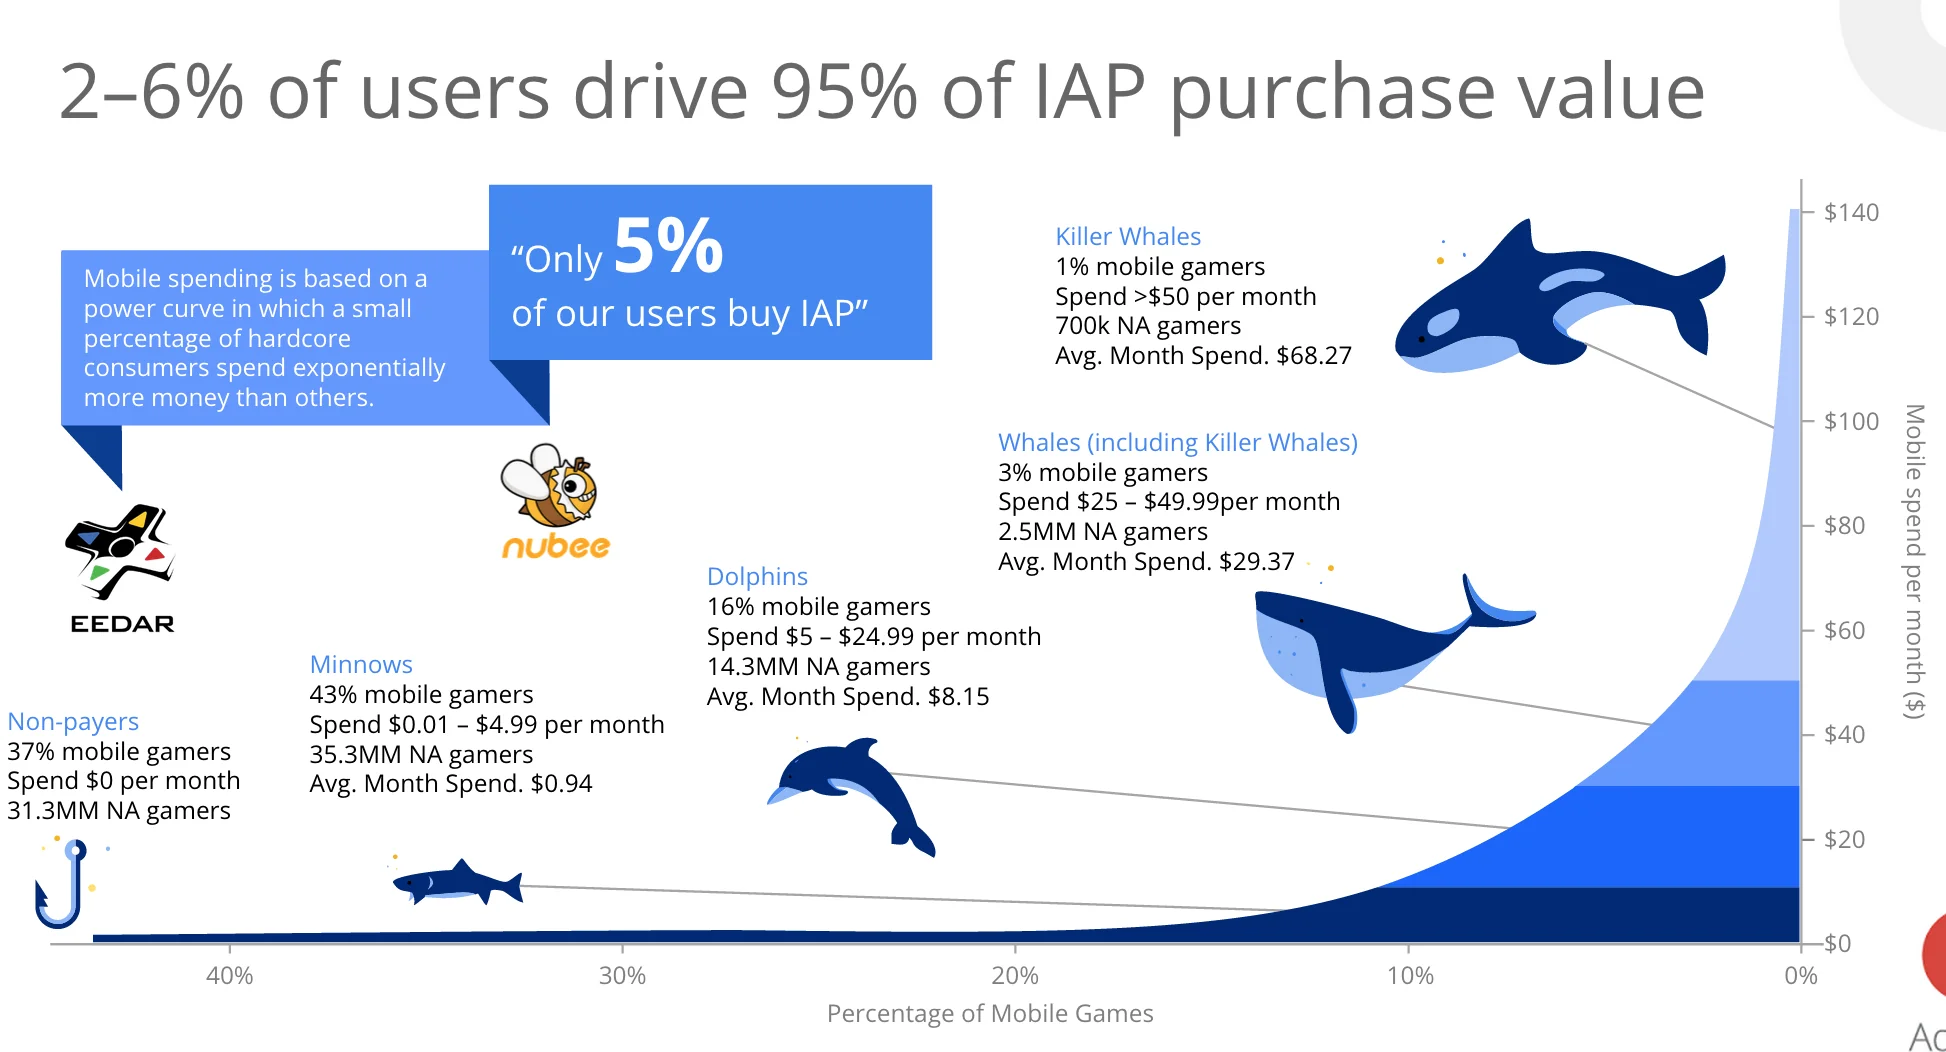

In [1]:
import pandas as pd
import numpy as np

# 1. SETUP: Create a random 'Population' (Minnows + Whales)
# We generate 1000 random users spending between $0 and $20
np.random.seed(5200)
population_data = np.random.normal(loc=10,scale=2,size=1000)
population = pd.DataFrame(population_data,columns=['user_spending'])

# 2. DROP SAMPLE: Take a random sample of 10 users from the population
sample = population.sample(n=100).copy()
sample

# Calculate Metrics (mean and median)
mean_1 = sample['user_spending'].mean()
median_1 = sample['user_spending'].median()


In [ ]:
mean_1

np.float64(9.791692704178915)

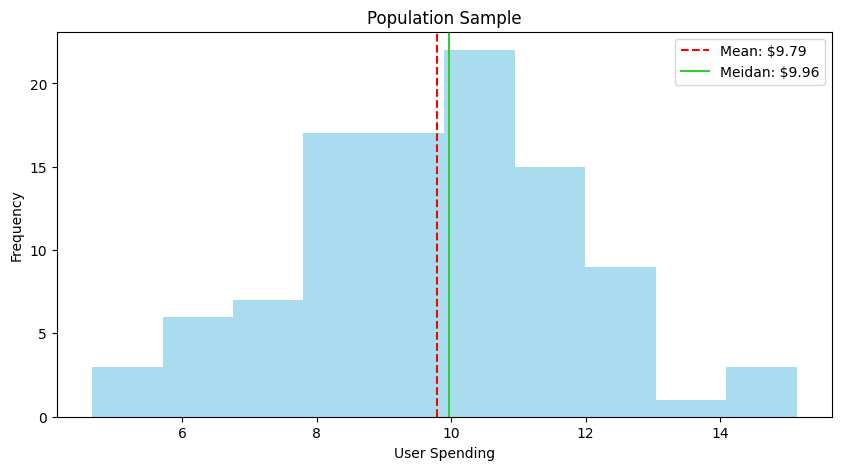

In [ ]:
# ==========================================
# 2. PLOT 1: Normal Distribution (Minnows)
# ==========================================

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(sample['user_spending'],bins=10,color='skyblue',alpha=0.7)
plt.axvline(mean_1, color = "red",linestyle = "--",label = f"Mean: ${mean_1:.2f}")
plt.axvline(median_1, color ="limegreen",label = f"Meidan: ${median_1:.2f}")
plt.legend()
plt.title("Population Sample")
plt.xlabel("User Spending")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# ==========================================
# 3. INTRODUCE OUTLIER (The Whale)
# ==========================================
# Add one user who spends $50,000
whale_row = pd.DataFrame({'user_spending':[50000]})
sample_with_whale = pd.concat([sample,whale_row],ignore_index=True)
sample_with_whale
# Calculate Metrics (With Whale)
mean_2 = sample_with_whale['user_spending'].mean()
median_2 = sample_with_whale['user_spending'].median()



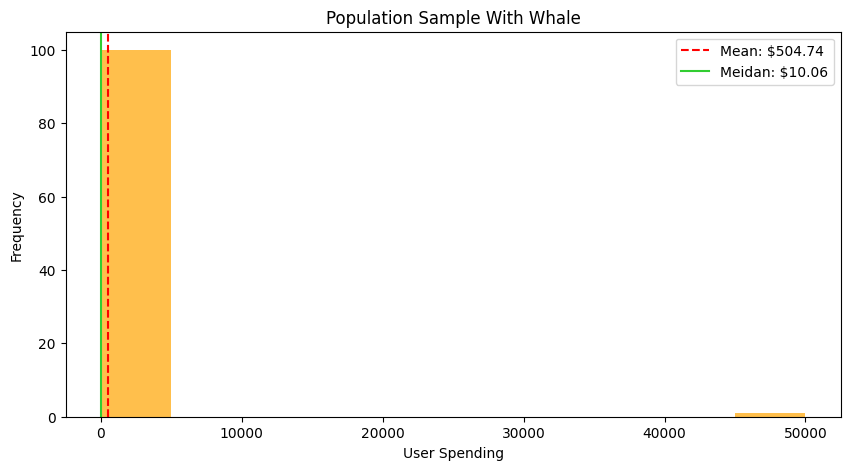

In [ ]:
# ==========================================
# 4. PLOT 2: Distribution with Outlier
# ==========================================
plt.figure(figsize=(10,5))
plt.hist(sample_with_whale['user_spending'],bins=10,color='orange',alpha=0.7)
plt.axvline(mean_2, color = "red",linestyle = "--",label = f"Mean: ${mean_2:.2f}")
plt.axvline(median_2, color ="limegreen",label = f"Meidan: ${median_2:.2f}")
plt.legend()
plt.title("Population Sample With Whale")
plt.xlabel("User Spending")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# How to fix it then?
# Method 1: The Statistical Way (IQR)
# 1. Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = sample_with_whale['user_spending'].quantile(0.25)
Q3 = sample_with_whale['user_spending'].quantile(0.75)
IQR = Q3 - Q1
IQR
# 2. Define the "Fences" (Standard is 1.5 times the IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Create a clean DataFrame by keeping only what is INSIDE the fences
clean_data = sample_with_whale[
    (sample_with_whale['user_spending'] >= lower_bound) & (sample_with_whale['user_spending'] <= upper_bound)
]
clean_data
# Calculate New Metrics
mean_3 = clean_data['user_spending'].mean()
median_3 = clean_data['user_spending'].median()



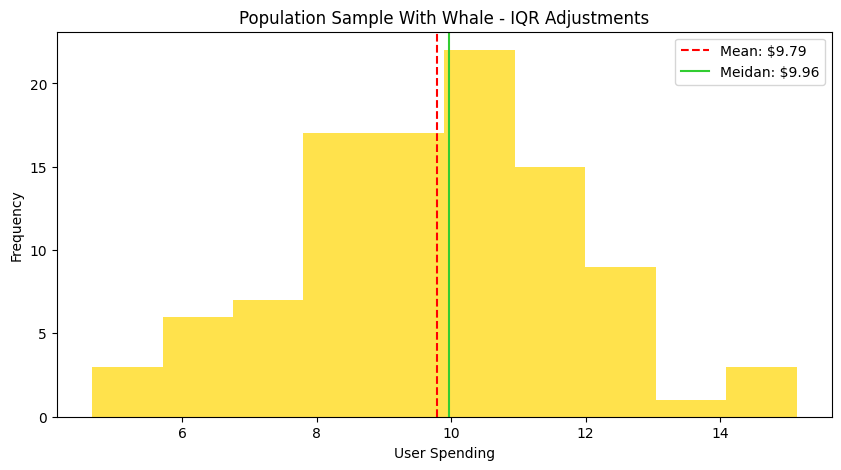

In [ ]:
# ==========================================
# 6. PLOT 3: Distribution with IQR Fix (Bad Application Here)
# ==========================================
plt.figure(figsize=(10,5))
plt.hist(clean_data['user_spending'],bins=10,color='gold',alpha=0.7)
plt.axvline(mean_3, color = "red",linestyle = "--",label = f"Mean: ${mean_3:.2f}")
plt.axvline(median_3, color ="limegreen",label = f"Meidan: ${median_3:.2f}")
plt.legend()
plt.title("Population Sample With Whale - IQR Adjustments")
plt.xlabel("User Spending")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# ==========================================
# 2. DEFINE FUNCTIONS MANUALLY
# ==========================================

# 1. Standard Deviation
def manual_std_dev(data):
    """
    Standard Deviation squares the error, so outliers explode the metric.
    Formula: sqrt( sum( (x - mean)^2 ) / (n-1) )
    """
    mean = data.mean()
    sqrt_diffs = (data - mean) ** 2
    variance = sqrt_diffs.sum() / (len(data)-1)
    return np.sqrt(variance)


In [ ]:
# ==========================================
# 2. DEFINE FUNCTIONS MANUALLY
# ==========================================
# 2. MAD

def manual_mad(data):
    """
    MAD uses absolute difference from the median, so outliers are ignored.
    Formula: median( | x - median | )
    """
    median = data.median()
    abs_diffs = np.abs(data - median)
    return abs_diffs.median()

In [ ]:
manual_mad(clean_data)

,0
user_spending,1.316694


In [ ]:
# ==========================================
# 3. COMPUTE & COMPARE
# ==========================================

# Without Outlier
print(manual_std_dev(sample_with_whale['user_spending']))
print(manual_mad(sample_with_whale['user_spending']))

# With Outlier
print(manual_std_dev(clean_data['user_spending']))
print(manual_mad(clean_data['user_spending']))




4974.212074733478
1.3136077727697284
2.087207689524846
1.3166936703354075
